# **`Smart Document Query System`**

# RAG
- Retrieval Augmented Generation

- RAG is used for better LLM (large language models )

- RAG (Retrieval-Augmented Generation) enhances the capabilities of normal LLMs by integrating retrieval systems, making it more adaptable, accurate, and capable of dealing with up-to-date and specialized information.
- RAG Model
- `Smart Document Query System` project development
- TO UNDERSTAND RAG LLM MODEL, WE NEED TO KNOW HOW TRADITIONAL LLM WORKS AND HOW IT IS DIFFERENT FROM RAG BASED LLM MODEL
                  TRADITIONL LLM FLOW MODEL

     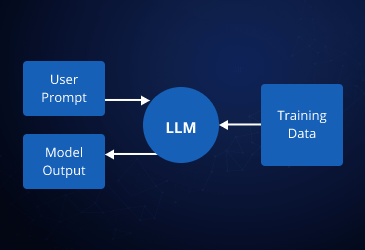

                  RAG BASED LLM FLOW MODEL

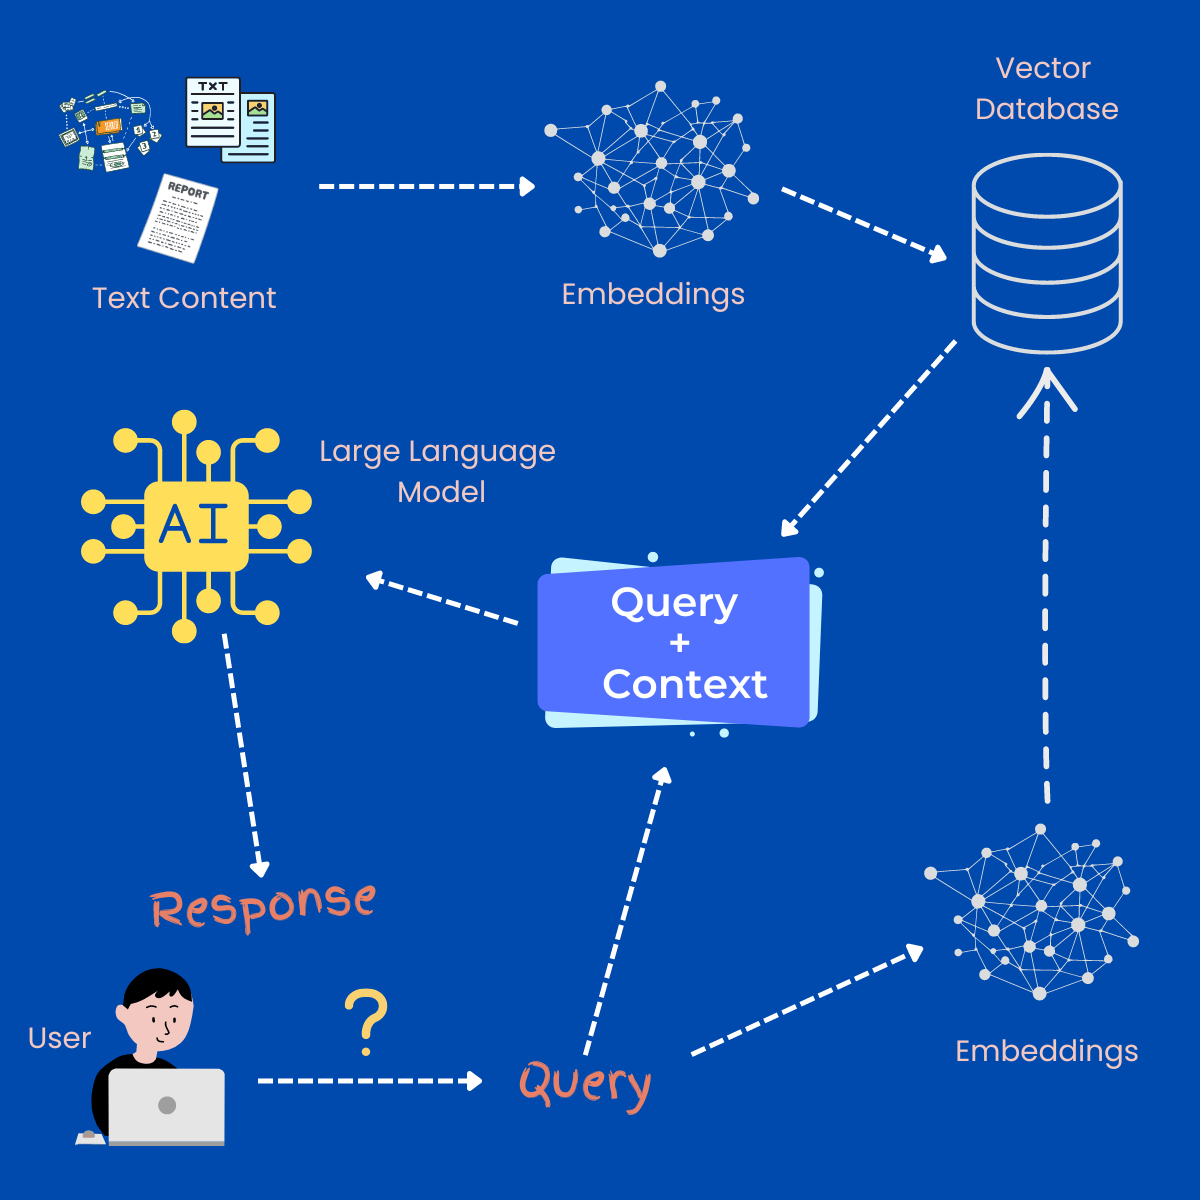

Installing required libraries :-

-    chromadb==0.5.5
-    langchain-chroma==0.1.2
-    langchain==0.2.11
-    langchain-community==0.2.10
-    langchain-text-splitters==0.2.2
-    langchain-groq==0.1.6
-    transformers==4.43.2
-    sentence-transformers==3.0.1
-    unstructured==0.15.0
-    unstructured[pdf]==0.15.0

# 1. Loading Libraries

In [4]:
import os

from langchain.document_loaders import UnstructuredFileIOLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain_chroma import Chroma
from langchain_groq import ChatGroq
from langchain.chains import RetrievalQA

# 2. Fetching API from GROQ

In [5]:
os.environ['GROQ_API_KEY']='Your_GROQ_API_KEY'

# 3. Loading url into response

In [2]:
# fetch pdf from url
import requests

url='https://courses.cs.umbc.edu/671/fall12/notes/python/04_python_functions.pdf'
response=requests.get(url)

# 3. Creating Python_inbuild_functions.pdf

In [6]:
#"C:\Users\CHARAN\Downloads\bit_manipulation.pdf"  # Use only the file name if it's in the same directory
with open("Python_inbuilt_Functions.pdf", 'wb') as file:
    file.write(response.content)

# 4. Getting data in the form of text and loading it in the documents

In [7]:
with open("Python_inbuilt_Functions.pdf", "rb") as f: # Open the file in binary mode ("rb")
    loader = UnstructuredFileIOLoader(file=f)
    documents = loader.load()
documents

[Document(page_content='Functions in Python\n\nDefining Functions\n\nFunction definition begins with “def.” Function name and its arguments.\n\ndef get_final_answer(filename): “““Documentation String”””\n\nline1 line2 return total_counter\n\nThe indentation matters… First line with less indentation is considered to be outside of the function definition.\n\nThe keyword ‘return’ indicates the value to be sent back to the caller.\n\nNo header file or declaration of types of function or arguments\n\nColon.\n\nPython and Types\n\nDynamic typing: Python determines the data types of variable bindings in a program automatically\n\nStrong typing: But Python’s not casual about types, it enforces the types of objects\n\nFor example, you can’t just append an integer to a string, but must first convert it to a string\n\nx = “the answer is ” # x bound to a string y = 23 # y bound to an integer. print x + y # Python will complain!\n\nCalling a Function\n\nThe syntax for a function call is: >>> def my

In [8]:
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=50)


In [9]:
text_splitter

In [11]:
type(text_splitter)

langchain_text_splitters.character.CharacterTextSplitter

In [10]:
texts = text_splitter.split_documents(documents)

In [12]:
type(texts)

list

In [13]:
texts[4]

Document(page_content='map, filter, reduce\n\n>>> def add1(x): return x+1 >>> def odd(x): return x%2 == 1 >>> def add(x,y): return x + y >>> map(add1, [1,2,3,4]) [2, 3, 4, 5] >>> map(+,[1,2,3,4],[100,200,300,400]) map(+,[1,2,3,4],[100,200,300,400]) ^ SyntaxError: invalid syntax >>> map(add,[1,2,3,4],[100,200,300,400]) [101, 202, 303, 404] >>> reduce(add, [1,2,3,4]) 10 >>> filter(odd, [1,2,3,4]) [1, 3]\n\nPython\n\nfunctional programming\n\nFunctions are first-class objects\n\nFunctions can be used as any other\n\ndatatype, eg: •\u202f Arguments to function •\u202f Return values of functions •\u202f Assigned to variables •\u202f Parts of tuples, lists, etc\n\n>>> def square(x): return x*x\n\n>>> def applier(q, x): return q(x)\n\n>>> applier(square, 7) 49\n\nLambda Notation\n\nPython’s lambda creates anonymous functions >>> lambda x: x + 1 <function <lambda> at 0x1004e6ed8> >>> f = lambda x: x + 1 >>> f <function <lambda> at 0x1004e6f50> >>> f(100) 101\n\nLambda Notation')

In [14]:
texts[2]

Document(page_content='But: see operator overloading in later slides (Note: van Rossum playing with function overloading for the future)\n\nDefault Values for Arguments\n\nYou can provide default values for a function’s arguments\n\nThese arguments are optional when the function is called\n\n>>> def myfun(b, c=3, d=“hello”):\n\nreturn b + c >>> myfun(5,3,”hello”) >>> myfun(5,3) >>> myfun(5)\n\nAll of the above function calls return 8\n\nKeyword Arguments\n\nCan call a function with some/all of its arguments out of order as long as you specify their names >>> def foo(x,y,z): return(2*x,4*y,8*z) >>> foo(2,3,4) (4, 12, 32) >>> foo(z=4, y=2, x=3) (6, 8, 32) >>> foo(-2, z=-4, y=-3) (-4, -12, -32)\n\nCan be combined with defaults, too\n\n>>> def foo(x=1,y=2,z=3): return(2*x,4*y,8*z) >>> foo() (2, 8, 24) >>> foo(z=100) (2, 8, 800)\n\nFunctions are first-class objects\n\nFunctions can be used as any other\n\ndatatype, eg: •\u202f Arguments to function •\u202f Return values of functions •\u202f

# 5. Converting text data into vectors - embeddings

In [15]:
embeddings = HuggingFaceEmbeddings()

<ipython-input-15-d0c9174021d8>:1: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 0.3.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  embeddings = HuggingFaceEmbeddings()
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
#!pip install sentence_transformers

# 6. Creating a vector Database

In [16]:
persist_directory = 'vector_db'

In [17]:
vectordb=Chroma.from_documents(documents=texts,embedding=embeddings,persist_directory=persist_directory)


# 7. Retrieval of the data from the vector_db

In [18]:
#retrival

retriever=vectordb.as_retriever()

In [19]:
llm=ChatGroq(model="llama-3.1-8b-Instant",temperature=0)

# 8. Retrieval Chain :
- It's part of a framework (like LangChain or Haystack) that helps manage the flow between a retriever (which fetches relevant documents from a knowledge base or corpus) and an LLM (which generates answers based on retrieved data).

In [20]:
qa_chain=RetrievalQA.from_chain_type(llm=llm,chain_type="stuff",retriever=retriever,return_source_documents=True)

# 9. Asking Queries and getting response from model

In [21]:
query = 'Give me summary about the pdf'
response= qa_chain.invoke({'query':query})

In [23]:
print(response)

{'query': 'Give me summary about the pdf', 'result': "The provided text appears to be a collection of notes on Python programming, specifically focusing on functional programming concepts. Here's a summary:\n\n**Key Concepts:**\n\n1. **Functions**: Functions are first-class objects in Python, meaning they can be used as arguments to other functions, returned as values from functions, and stored in data structures.\n2. **Lambda Notation**: Lambda functions are anonymous functions that can be defined inline using the `lambda` keyword. They can take any number of arguments, but can only contain a single expression.\n3. **Map, Filter, Reduce**: These are built-in functions that allow for functional programming idioms. `map` applies a function to each element of an iterable, `filter` returns a new iterable with only the elements for which a function returns `True`, and `reduce` applies a function to the elements of an iterable, reducing them to a single value.\n4. **Composition**: Functions

In [22]:
print(response['result'])

The provided text appears to be a collection of notes on Python programming, specifically focusing on functional programming concepts. Here's a summary:

**Key Concepts:**

1. **Functions**: Functions are first-class objects in Python, meaning they can be used as arguments to other functions, returned as values from functions, and stored in data structures.
2. **Lambda Notation**: Lambda functions are anonymous functions that can be defined inline using the `lambda` keyword. They can take any number of arguments, but can only contain a single expression.
3. **Map, Filter, Reduce**: These are built-in functions that allow for functional programming idioms. `map` applies a function to each element of an iterable, `filter` returns a new iterable with only the elements for which a function returns `True`, and `reduce` applies a function to the elements of an iterable, reducing them to a single value.
4. **Composition**: Functions can be composed together to create new functions. This is de

In [24]:
query='how to check the i th bit is set or not set'
response=qa_chain.invoke({'query':query})
print(response['result'])
print("="*30)
# print("Source_documents: ",response["source_documents"][0].metadata['source'])

In Python, you can check if the ith bit is set or not by using the bitwise AND operator (&) with a mask that has the ith bit set. 

Here's how you can do it:

```python
def check_bit(n, i):
    # Create a mask with the ith bit set
    mask = 1 << i
    
    # Use the bitwise AND operator to check if the ith bit is set
    return (n & mask) != 0

# Example usage:
n = 15  # Binary: 1111
i = 2   # Index of the bit to check

print(check_bit(n, i))  # Output: True
```

In this code, `1 << i` shifts the binary number 1 to the left by `i` places, effectively creating a mask with the ith bit set. The bitwise AND operator (`&`) then checks if the ith bit of `n` is set by performing a bitwise AND operation with the mask. If the result is non-zero, it means the ith bit is set.

Alternatively, you can use the bitwise AND operator with a mask that has all bits set except the ith bit:

```python
def check_bit(n, i):
    # Create a mask with all bits set except the ith bit
    mask = ~(1 << i)
    
 